# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### SIDHANT THAKUR

**Honor Pledge:**  
I pledge on my honor that I, **SIDHANT THAKUR**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [67]:
import sklearn
sklearn.__version__

'1.0.2'

In [68]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [70]:
df = pd.read_csv('gas_emissions.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


#### Is there any missing data?

In [71]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

There is no missing value

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [72]:
high_co_rows = df[df['CO'] > 3]
average_ap = high_co_rows['AP'].mean()
print(average_ap)

1015.6900173490633


#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

<AxesSubplot:>

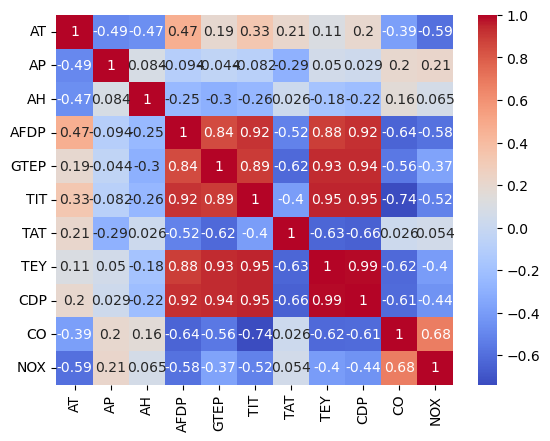

In [73]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

The variable have high correlation are AFDP and AP, TEY and GTEP, CDP and GTEP, TEY and TIT, CDP and TIT, CDP and TEY, 

#### Create a scatter plot of 'TEY' vs 'CDP'

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

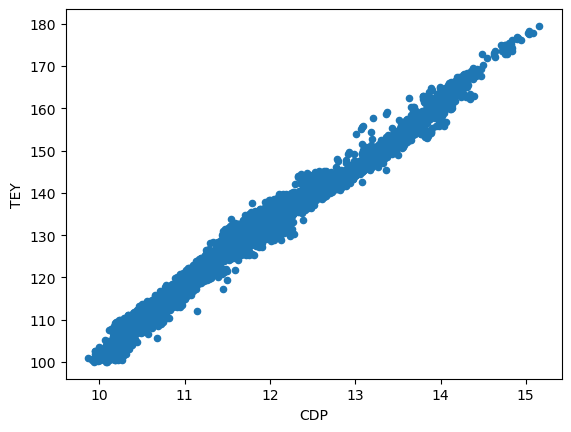

In [74]:
df.plot(x='CDP', y='TEY', kind='scatter')

#### Create histograms for CO and NOX.

<AxesSubplot:ylabel='Frequency'>

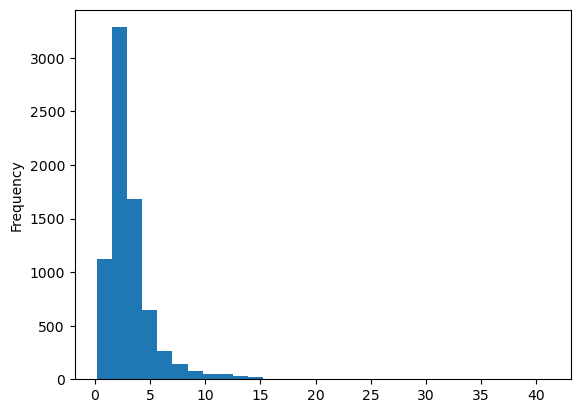

In [75]:
df['CO'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

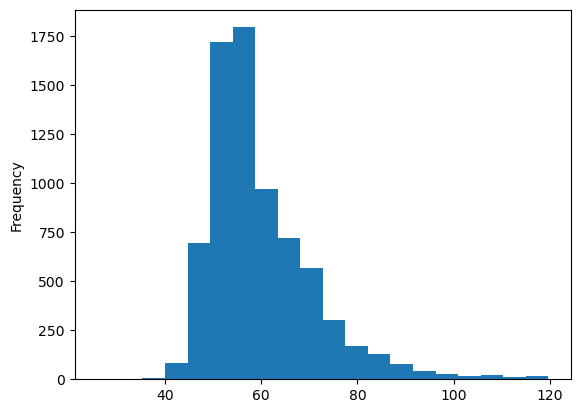

In [76]:
df['NOX'].plot(kind='hist', bins=20)

#### Create a sctter plot of CO vs NOX.

<AxesSubplot:xlabel='NOX', ylabel='CO'>

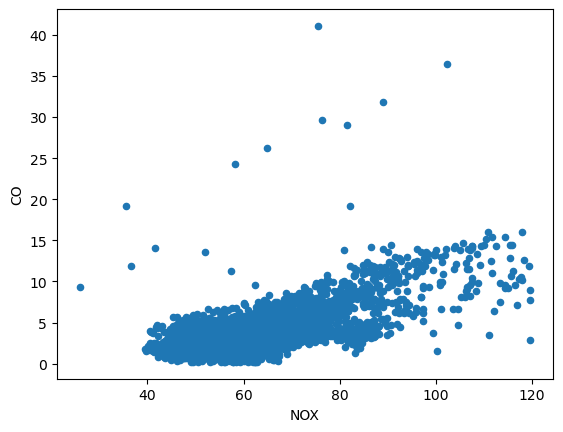

In [77]:
df.plot(x='NOX', y='CO', kind='scatter')

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [78]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [80]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [81]:
X_train.shape

(5316, 9)

In [82]:
X_val.shape

(1329, 9)

In [83]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [116]:
import pandas as pd

scores_df = pd.DataFrame(columns=['Model', 'Score'])

def store_score(model_name, score):
    global scores_df
    scores_df = scores_df.append({'Model': model_name, 'Score': score}, ignore_index=True)
    print(f"Score for {model_name}: {score}")

In [118]:
# create a Linear Regression model
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

store_score('Linear Regression (train)', train_r2)
store_score('Linear Regression (val)', val_r2)
store_score('Linear Regression (train)', train_rmse)
store_score('Linear Regression (val)', val_rmse)

Score for Linear Regression (train): 0.6640090820784397
Score for Linear Regression (val): 0.646343190818214
Score for Linear Regression (train): 1.2720122104103535
Score for Linear Regression (val): 1.3884894690085987


/var/folders/5z/blnwvblx1ksfbt_q5ytvsnmr0000gp/T/ipykernel_18239/1183603400.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({'Model': model_name, 'Score': score}, ignore_index=True)
/var/folders/5z/blnwvblx1ksfbt_q5ytvsnmr0000gp/T/ipykernel_18239/1183603400.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({'Model': model_name, 'Score': score}, ignore_index=True)
/var/folders/5z/blnwvblx1ksfbt_q5ytvsnmr0000gp/T/ipykernel_18239/1183603400.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({'Model': model_name, 'Score': score}, ignore_index=True)
/var/folders/5z/blnwvblx1ksfbt_q5ytvsnmr0000gp/T/ipykernel_18239/1183603400.py:7: Future

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
 y_train_pred = regressor.predict(X_train)
y_val_pred = regressor.predict(X_val)
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [87]:
print("R-squared on training data:",(r2_train))
print("R-squared on validation data:",(r2_val))
print("RMSE on training data:",(rmse_train))
print("RMSE on validation data:",(rmse_val))


R-squared on training data: 0.6640090820784397
R-squared on validation data: 0.646343190818214
RMSE on training data: 1.2720122104103535
RMSE on validation data: 1.3884894690085987


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [112]:
estimator.fit(X_train, y_train)

# Calculate the R2 score on the training data
y_train_pred = estimator.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate the R2 score on the validation data
y_val_pred = estimator.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)

# Calculate the RMSE on the training data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate the RMSE on the validation data
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

# Print the results
print("R2 score on training data: {:.3f}".format(r2_train))
print("R2 score on validation data: {:.3f}".format(r2_val))
print("RMSE on training data: {:.3f}".format(rmse_train))
print("RMSE on validation data: {:.3f}".format(rmse_val))


R2 score on training data: 0.964
R2 score on validation data: 0.756
RMSE on training data: 0.419
RMSE on validation data: 1.154


In [113]:
r2_diff = abs(r2_train - r2_val)
print("Difference between training and validation R-squared: {:.3f}".format(r2_diff))

Difference between training and validation R-squared: 0.208


This suggests that the model is performing well on the training data, but there may be some overfitting, as the performance on the validation data is lower than on the training data. It may be necessary to tune the hyperparameters or adjust the model to improve the validation performance.

In [114]:
# Define the parameter grid for the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

# Create a Random Forest Regression model
rf = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and fit the model on the training data
best_params = grid_search.best_params_
rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)

# Calculate the R2 score on the training data
y_train_pred = rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate the R2 score on the validation data
y_val_pred = rf.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)

# Calculate the RMSE on the training data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate the RMSE on the validation data
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

# Print the results
print("Best hyperparameters: ", best_params)
print("R2 score on training data: {:.3f}".format(r2_train))
print("R2 score on validation data: {:.3f}".format(r2_val))
print("RMSE on training data: {:.3f}".format(rmse_train))
print("RMSE on validation data: {:.3f}".format(rmse_val))

Best hyperparameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
R2 score on training data: 0.818
R2 score on validation data: 0.746
RMSE on training data: 0.936
RMSE on validation data: 1.177


In [115]:
r2_diff = abs(r2_train - r2_val)
print("Difference between training and validation R-squared: {:.3f}".format(r2_diff))

Difference between training and validation R-squared: 0.072


## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [203]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [204]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [205]:
estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [206]:
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)

In [207]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [208]:
print("Linear kernel SVR:")
print("R2 on training data:", r2_train)
print("R2 on validation data:", r2_val)
print("RMSE on training data:", rmse_train)
print("RMSE on validation data:", rmse_val)

Linear kernel SVR:
R2 on training data: 0.6244412583337272
R2 on validation data: 0.6021771925365862
RMSE on training data: 1.3448270895923353
RMSE on validation data: 1.4726394044713864


### Polynomial Kernel SVM Regressor

In [209]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [210]:
estimator.fit(X_train, y_train)

SVR(kernel='poly')

In [211]:
# Make predictions on training and validation sets using the Polynomial kernel SVR model
y_train_pred_poly = estimator.predict(X_train)
y_val_pred_poly = estimator.predict(X_val)

# Calculate R2 and RMSE on training set
r2_train_poly = r2_score(y_train, y_train_pred_poly)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))

# Calculate R2 and RMSE on validation set
r2_val_poly = r2_score(y_val, y_val_pred_poly)
rmse_val_poly = np.sqrt(mean_squared_error(y_val, y_val_pred_poly))


In [212]:
print("Polynomial kernel SVR:")
print("R2 on training data:", r2_train_poly)
print("R2 on validation data:", r2_val_poly)
print("RMSE on training data:", rmse_train_poly)
print("RMSE on validation data:", rmse_val_poly)

Polynomial kernel SVR:
R2 on training data: 0.7404852376508414
R2 on validation data: 0.7310487212257811
RMSE on training data: 1.1179143857689056
RMSE on validation data: 1.210844531836506


### RBF Kernel SVM Regressor

In [213]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

estimator.fit(X_train, y_train)

SVR()

In [214]:
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)

# Calculate R2 and RMSE on training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R2 and RMSE on validation set
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [215]:
print("RBF kernel SVR:")
print("R2 on training data:", r2_train)
print("R2 on validation data:", r2_val)
print("RMSE on training data:", rmse_train)
print("RMSE on validation data:", rmse_val)


RBF kernel SVR:
R2 on training data: 0.7653225070588423
R2 on validation data: 0.7476173201040639
RMSE on training data: 1.0630733502205554
RMSE on validation data: 1.1729550025939743


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [351]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the model
svr = SVR(kernel='rbf')

# Define the hyperparameters to tune
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform GridSearchCV with 5-fold cross validation
grid = GridSearchCV(svr, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R2 score
print("Best hyperparameters:", grid.best_params_)
print("R2 score on training data:", grid.best_score_)
print("R2 score on validation data:", grid.score(X_val, y_val))
print("R2 score on testing data:", grid.score(X_test, y_test))

# Predict on the training, validation, and testing sets
y_train_pred = grid.predict(X_train)
y_val_pred = grid.predict(X_val)
y_test_pred = grid.predict(X_test)

# Calculate the RMSE on the training, validation, and testing sets
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("RMSE on training data:", rmse_train)
print("RMSE on validation data:", rmse_val)
print("RMSE on testing data:", rmse_test)

Best hyperparameters: {'C': 1000, 'gamma': 0.01}
R2 score on training data: 0.785094659580495
R2 score on validation data: 0.7568500533368892
R2 score on testing data: 0.5764708547341918
RMSE on training data: 1.0002485869507802
RMSE on validation data: 1.1513004313829553
RMSE on testing data: 1.5188236679191662


Yes, Value of R2 increased

## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [355]:
from sklearn.decomposition import PCA

In [356]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


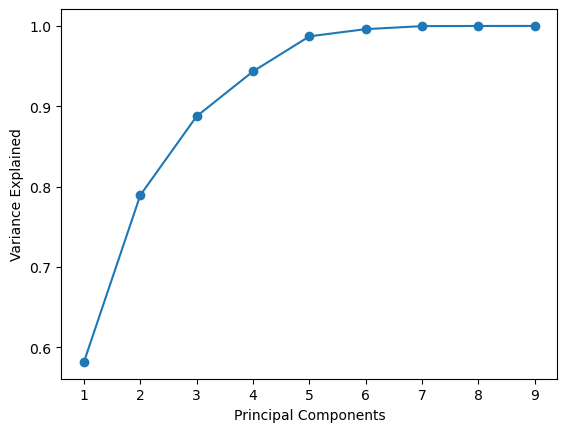

In [357]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [358]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [222]:
linreg = LinearRegression()
linreg.fit(X_train_pca2, y_train)
y_train_pred = linreg.predict(X_train_pca2)
y_val_pred = linreg.predict(X_val_pca2)

R2_train = linreg.score(X_train_pca2, y_train)
R2_val = linreg.score(X_val_pca2, y_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Linear Regression with PCA")
print("R2 on training data:", R2_train)
print("R2 on validation data:", R2_val)
print("RMSE on training data:", rmse_train)
print("RMSE on validation data:", rmse_val)

Linear Regression with PCA
R2 on training data: 0.6557906042002006
R2 on validation data: 0.6333206399655547
RMSE on training data: 1.2874751982855395
RMSE on validation data: 1.4138222446020625


**RF Regression with PCA transformed data**

In [223]:
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [10, 50, 100, 200],
'max_depth': [2, 5, 10, None],
'min_samples_split': [2, 5, 10]}

In [224]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')
rf_grid.fit(X_train_pca2, y_train)

best_rf = rf_grid.best_estimator_
best_rf.fit(X_train_pca2, y_train)

y_train_pred = best_rf.predict(X_train_pca2)
y_val_pred = best_rf.predict(X_val_pca2)

R2_train = best_rf.score(X_train_pca2, y_train)
R2_val = best_rf.score(X_val_pca2, y_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("RF Regression with PCA")
print("R2 on training data:", R2_train)
print("R2 on validation data:", R2_val)
print("RMSE on training data:", rmse_train)
print("RMSE on validation data:", rmse_val)

RF Regression with PCA
R2 on training data: 0.9662808905467895
R2 on validation data: 0.7390904390600782
RMSE on training data: 0.40296336004093414
RMSE on validation data: 1.1926048606533188


**SVM Regression with PCA transformed data**

In [225]:
rbf_svr = SVR(kernel='rbf')

param_grid = {'C': [0.1, 1, 10, 100],
'gamma': [0.1, 1, 10, 100]}


In [226]:
rbf_svr_grid = GridSearchCV(rbf_svr, param_grid=param_grid, cv=5, scoring='r2')
rbf_svr_grid.fit(X_train_pca2, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             scoring='r2')

In [227]:
rbf_svr_grid = rbf_svr_grid.best_estimator_
rbf_svr_grid.fit(X_train_pca2, y_train)

y_train_pred = rbf_svr_grid.predict(X_train_pca2)
y_val_pred = rbf_svr_grid.predict(X_val_pca2)

R2_train = rbf_svr_grid.score(X_train_pca2, y_train)
R2_val = rbf_svr_grid.score(X_val_pca2, y_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("SVM Regression with PCA")
print("R2 on training data:", R2_train)
print("R2 on validation data:", R2_val)
print("RMSE on training data:", rmse_train)
print("RMSE on validation data:", rmse_val)

SVM Regression with PCA
R2 on training data: 0.788832644198745
R2 on validation data: 0.7521975437226629
RMSE on training data: 1.0084187265587004
RMSE on validation data: 1.1622629170822476


1) Linear Regression

R-squared on training data: 0.6640090820784397

R-squared on validation data: 0.646343190818214

RMSE on training data: 1.2720122104103535

RMSE on validation data: 1.3884894690085987
    
2) PCA with Linear Regression    

R2 on training data: 0.6557906042002006

R2 on validation data: 0.6333206399655547

RMSE on training data: 1.2874751982855395

RMSE on validation data: 1.4138222446020625


Based on the results, we can observe a slight decrease in the performance of the PCA with Linear Regression model compared to the Linear Regression model. The R-squared and RMSE values are slightly lower in the PCA with Linear Regression model, indicating that the model may not be performing as well as the Linear Regression model. This could be due to the loss of some information during the PCA transformation, which may affect the model's ability to capture the underlying patterns in the data. However, the difference in performance is not significant, so it may be worth exploring further to see if other models could potentially benefit from the PCA transformation.

1) Random Forest
R-squared on training data: 0.6640090820784397


R-squared on validation data: 0.646343190818214

RMSE on training data: 1.2720122104103535

RMSE on validation data: 1.3884894690085987

2) RF Regression with PCA

R2 on training data: 0.9662808905467895

R2 on validation data: 0.7390904390600782

RMSE on training data: 0.40296336004093414

RMSE on validation data: 1.1926048606533188

There is a significant change in the performance of the two models. The Random Forest Regression with PCA model has higher R-squared scores and lower RMSE values on both training and validation data, indicating better performance than the regular Random Forest Regression model. This improvement is mainly due to the reduced dimensionality of the data through PCA, which helps in capturing the most relevant information and reducing noise. As a result, the model is less complex and can better generalize to new data. Overall, the RF Regression with PCA model outperforms the regular RF Regression model in this scenario.


1) RBF kernel SVR:

R2 on training data: 0.7653225070588423

R2 on validation data: 0.7476173201040639

RMSE on training data: 1.0630733502205554

RMSE on validation data: 1.1729550025939743

2) SVM Regression with PCA

R2 on training data: 0.788832644198745

R2 on validation data: 0.7521975437226629

RMSE on training data: 1.0084187265587004

RMSE on validation data: 1.1622629170822476


After comparing the two model results, we can see that the SVM Regression with PCA model has a better performance than the RBF Kernel SVR model.

The R2 scores for the SVM Regression with PCA model are higher on both training and validation data, indicating a better fit of the model. The RMSE values for the SVM Regression with PCA model are also lower, indicating that the predicted values are closer to the actual values. 

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [228]:
from sklearn.preprocessing import Binarizer

In [229]:
binarizer = Binarizer(threshold=3)

In [230]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [231]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

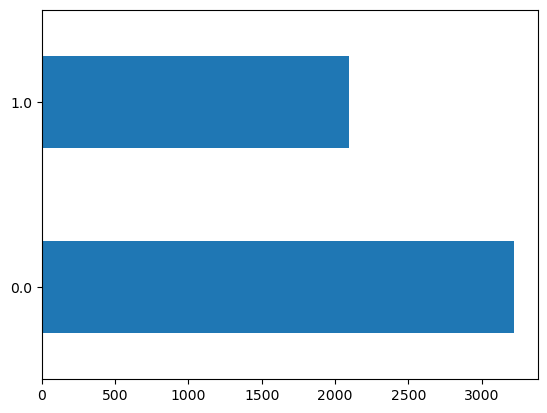

In [232]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [268]:
from sklearn.svm import SVC

# SVC Model 1 

In [252]:
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [254]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [256]:
best_svc = grid_search.best_estimator_
print('Best C:', best_svc.C)
print('Best gamma:', best_svc.gamma)
best_svc.fit(X_train, y_train_cat)

Best C: 1
Best gamma: 1


SVC(C=1, gamma=1)

In [259]:
y_val_pred = best_svc.predict(X_val)

In [262]:
conf_mat = metrics.confusion_matrix(y_val_cat, y_val_pred)
print('Confusion matrix:')
print(conf_mat)

Confusion matrix:
[[762  50]
 [ 68 449]]


In [263]:
print(metrics.classification_report(y_val_cat, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.87      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



In [285]:
tn, fp, fn, tp = conf_mat.ravel()
recall = recall_score(y_val_cat, y_val_pred)
print("recall",recall)
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
balanced_accuracy = (recall + specificity) / 2
print("balanced_accuracy",balanced_accuracy)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

recall 0.8646034816247582
balanced_accuracy 0.9015135634724776
Specificity: 0.9384236453201971
False Positive Rate: 0.06157635467980296


# SVC Model 2

In [270]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator, param_grid, cv=5)
grid_search.fit(X_train_pca2, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [272]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [277]:
best_estimator = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_estimator.fit(X_train_pca2, y_train_cat)

y_val_pred = best_estimator.predict(X_val_pca2)



In [278]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

confusion = confusion_matrix(y_val_cat, y_val_pred)
print(confusion)


[[764  48]
 [ 70 447]]


In [280]:
print(metrics.classification_report(y_val_cat, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



In [286]:
recall = recall_score(y_val_cat, y_val_pred)
print("recall",recall)
precision = precision_score(y_val_cat, y_val_pred)
f1 = f1_score(y_val_cat, y_val_pred)

tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("specificity",specificity)
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)
balanced_accuracy = (recall + specificity) / 2
print("balanced_accuracy",balanced_accuracy)

recall 0.8646034816247582
specificity 0.9408866995073891
False Positive Rate: 0.059113300492610835
balanced_accuracy 0.9027450905660737


# Q8 [10]


- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

# Feature selection and Ensemle method using Ridge Regression 

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [125]:
# split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [126]:

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(Ridge(alpha=0.1))),
    ('regression', Ridge(alpha=0.1))
])

pipeline1.fit(X_train, y_train)
y_val_pred = pipeline1.predict(X_val)
r2_val1 = r2_score(y_val, y_val_pred)
rmse_val1 = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("R2 score for validation set with RFE feature selection:", r2_val1)
print("RMSE for validation set with RFE feature selection:", rmse_val1)


R2 score for validation set with RFE feature selection: 0.6281270406953349
RMSE for validation set with RFE feature selection: 1.4237996373671462


In [127]:
# create a pipeline for PCA-transformed data with Random Forest regression
pipeline2 = Pipeline([
    ('pca', PCA(n_components=5)),
    ('regression', RandomForestRegressor())
])

# use GridSearchCV to tune hyperparameters of the Random Forest regression
param_grid = {
    'regression__n_estimators': [50, 100, 200],
    'regression__max_depth': [2, 5, 10, None],
    'regression__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline2, param_grid=param_grid, cv=5,)
grid_search.fit(X_train, y_train)

# train and evaluate the best pipeline on the validation set
best_pipeline = grid_search.best_estimator_
y_val_pred = best_pipeline.predict(X_val)
r2_val2 = r2_score(y_val, y_val_pred)
rmse_val2 = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("R2 score for validation set with Random Forest regression:", r2_val2)
print("RMSE for validation set with Random Forest regression:", rmse_val2)

R2 score for validation set with Random Forest regression: 0.7482656410488867
RMSE for validation set with Random Forest regression: 1.171447489704912


Yes, the validation performance increases.
Based on the R-squared and RMSE values, it seems that Random Forest Regression performs the best on the validation set. It has the highest R-squared value and the lowest RMSE value, indicating that it is able to explain the most variance in the target variable and has the smallest prediction errors.

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

## Using Random forest Classifier

In [363]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train_pca2, y_train_cat)

y_val_pred = rf.predict(X_val_pca2)


recall = recall_score(y_val_cat, y_val_pred)
print('recall',recall)
precision = precision_score(y_val_cat, y_val_pred)
print('precision',precision)
f1 = f1_score(y_val_cat, y_val_pred)
print('f1',f1)
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print('specificity',specificity)
balanced_accuracy = (recall + specificity) / 2
print('balanced_accuracy',balanced_accuracy)

recall 0.8529980657640233
precision 0.9074074074074074
f1 0.8793619142572283
specificity 0.9347290640394089
balanced_accuracy 0.8938635649017161


In [295]:
confusion = confusion_matrix(y_val_cat, y_val_pred)
print(confusion)

[[763  49]
 [ 72 445]]


In [294]:
print(metrics.classification_report(y_val_cat, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.90      1329
weighted avg       0.91      0.91      0.91      1329



## Using feature selection

In [371]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=5)
X_train_selected = selector.fit_transform(X_train_pca2, y_train_cat)
X_val_selected = selector.transform(X_val_pca2)

svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train_selected, y_train_cat)

y_val_pred = svm.predict(X_val_selected)


recall = recall_score(y_val_cat, y_val_pred)
print('recall',recall)
precision = precision_score(y_val_cat, y_val_pred)
print('precision',precision)
f1 = f1_score(y_val_cat, y_val_pred)
print('f1',f1)
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print('specificity',specificity)

balanced_accuracy = (recall + specificity) / 2
print('balanced_accuracy',balanced_accuracy)


recall 0.8820116054158608
precision 0.8958742632612967
f1 0.888888888888889
specificity 0.9347290640394089
balanced_accuracy 0.9083703347276348


In [372]:
confusion = confusion_matrix(y_val_cat, y_val_pred)
print(confusion)

[[759  53]
 [ 61 456]]


In [373]:
print(metrics.classification_report(y_val_cat, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       812
         1.0       0.90      0.88      0.89       517

    accuracy                           0.91      1329
   macro avg       0.91      0.91      0.91      1329
weighted avg       0.91      0.91      0.91      1329



## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



## Based on the R-squared and RMSE values on the validation set, the best two regressors are: 

### Random Forest Regressor with 100 tree 

### RBF kernel SVR with hyperparameter tuning

In [345]:
# Random Forest Regressor with 100 tree 
y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

# Calculate R-squared on training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE on training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print results
print("R-squared on training data: {}".format(r2_train))
print("R-squared on testing data: {}".format(r2_test))
print("RMSE on training data: {}".format(rmse_train))
print("RMSE on testing data: {}".format(rmse_test))

R-squared on training data: 0.9635412068046666
R-squared on testing data: 0.533285229527154
RMSE on training data: 0.419014117669241
RMSE on testing data: 1.5943786788474006


In [352]:
# RBF kernel SVR with hyperparameter tuning
#grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R2 score
print("Best hyperparameters:", grid.best_params_)
print("R2 score on training data:", grid.best_score_)
print("R2 score on testing data:", grid.score(X_test, y_test))

# Predict on the training, and testing sets
y_train_pred = grid.predict(X_train)

y_test_pred = grid.predict(X_test)

# Calculate the RMSE on the training, validation, and testing sets
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("RMSE on training data:", rmse_train)

print("RMSE on testing data:", rmse_test)

Best hyperparameters: {'C': 1000, 'gamma': 0.01}
R2 score on training data: 0.785094659580495
R2 score on testing data: 0.5764708547341918
RMSE on training data: 1.0002485869507802
RMSE on testing data: 1.5188236679191662


It appears that RBF kernel SVR with hyperparameter tuning performs better

##  The two best classifiers are Random Forest and feature selection. 

In [364]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train_pca2, y_train_cat)

y_val_pred = rf.predict(X_val_pca2)
predTrain = rf.predict(X_train_pca2)
print("Accuracy of training :",metrics.accuracy_score(y_train_cat, predTrain))

predTest = rf.predict(X_test_pca2)

print("Accuracy of testing:",metrics.accuracy_score(y_test_cat, predTest))

Accuracy of training : 0.9202407825432656
Accuracy of testing: 0.9147496617050067


In [367]:
print(metrics.classification_report(y_test_cat, predTest))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       467
         1.0       0.89      0.87      0.88       272

    accuracy                           0.91       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.91      0.91      0.91       739



In [369]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=5)
X_train_selected = selector.fit_transform(X_train_pca2, y_train_cat)
X_val_selected = selector.transform(X_val_pca2)

svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train_selected, y_train_cat)

y_val_pred = svm.predict(X_val_selected)

predTrain = rf.predict(X_train_pca2)
print("Accuracy of training :",metrics.accuracy_score(y_train_cat, predTrain))

predTest = rf.predict(X_test_pca2)

print("Accuracy of testing:",metrics.accuracy_score(y_test_cat, predTest))



Accuracy of training : 0.9202407825432656
Accuracy of testing: 0.9147496617050067


In [379]:
print(metrics.classification_report(y_test_cat, predTest))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       467
         1.0       0.89      0.87      0.88       272

    accuracy                           0.91       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.91      0.91      0.91       739



Yes, this line with our analysis.

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_